# Actor-Critic test of best models

In [22]:
import numpy as np

from IPython.display import clear_output

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import torch
import torch.nn as nn

# Check for CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Reproducible results
torch.manual_seed(0)

import gym

from actor_critic import ActorCritic
import os

In [26]:
def sample_one_episode(env: gym.Env, model: ActorCritic):
    state = env.reset()
    done = False

    total_reward = 0

    while not done:
        state = torch.unsqueeze(torch.FloatTensor(state), 0).to(device)
        probability_dist, values = model(state)
        action_to_take = probability_dist.sample()
        next_state, reward, done, _ = env.step(action_to_take.cpu().detach().numpy()[0])
        state = next_state

        total_reward += reward

    return total_reward

In [50]:
# Load
# PATH = "best_models/num_env24-num_episodes100000-learning_rate0.003-hidden_layers128-128.pt"
#PATH = "best_models/num_env24-num_episodes50000-learning_rate0.002-hidden_layers128-128.pt"

PATH = "best_models/num_env24-num_episodes100000-learning_rate0.002-hidden_layers128-128.pt"

model_load = torch.load(PATH)
model_load.eval()

model_load.state_dict()

model_load_env = gym.make("CartPole-v1")
state = model_load_env.reset()
model_load_env.seed(0)

[0]

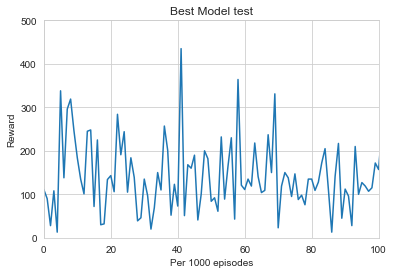

In [63]:
#model_load_env = gym.make("CartPole-v0")
model_load_env.seed(0)

model_load_total_rewards = []


for _ in range(500):
    model_load_rewards = sample_one_episode(env=model_load_env,model=model_load)
    model_load_total_rewards.append(model_load_rewards)
    

model_load_total_rewards

plt.title(f"Best Model test");
plt.xlabel("Per 1000 episodes");
plt.ylabel("Reward");
plt.ylim([0, 500]);
plt.xlim([0, 100]);
plt.plot(model_load_total_rewards);

In [65]:
min(model_load_total_rewards), max(model_load_total_rewards), np.std(model_load_total_rewards), np.mean(model_load_total_rewards)

(13.0, 500.0, 85.36220847658522, 139.558)